In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from scipy.stats import gaussian_kde
import pandas as pd

In [75]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wigets

In [62]:
def estimate_maxima(data):

    kde = gaussian_kde(data)
   
    samples = np.arange(min(data), max(data), 1e-9)

    probs = kde.evaluate(samples)
    maxima_index = probs.argmax()
#     plt.figure()
#     plt.plot(probs)
#     plt.show()
    critical_v = probs.max()/2+probs.min()/2
    half_width = max(data)
    for i in range(1, len(probs)):
        if (probs[i-1]<critical_v and probs[i]>=critical_v) or (probs[i-1]>critical_v and probs[i]<=critical_v):
            l = np.abs(samples[i]-samples[maxima_index])
            if l<half_width:
                half_width = l
    width = half_width*2
    probs[probs<probs.max()/2] = 0
    maxima = samples[maxima_index]

    return maxima, width

In [6]:
measures = {}
for f in listdir():
    if f[-3:]=='csv':
        with open(f, 'r') as name:
            data = pd.read_csv(name, skiprows=13, delimiter=';')
            
            new_cols = np.concatenate((data.values[0][:3], np.array(data.columns[3:5])))
            
            new_cols = dict(zip(data.columns, 
                                         [s.strip() for s in new_cols]))
            data.rename(columns=new_cols, inplace=True)
            new_cols['PM100D 200430215'] = 'Small [W]'
            new_cols['PM100D 190827111'] = 'Big [W]'
            data.rename(columns=new_cols, inplace=True)
            data = data.drop(data.index[[0]])
            
            if 'Small [W]' in data.columns:
                data['Small [W]'] = data['Small [W]'].apply(lambda x: float(x.strip().replace(',', '.')))
            
            if 'Big [W]' in data.columns:
                data['Big [W]'] = data['Big [W]'].apply(lambda x: float(x.strip().replace(',', '.'))) 
                
            data['Samples'] = data['Samples'].apply(lambda x: int(x))
            measures[f] = data


In [123]:
names = []
W_small_est = []
W_small_width = []
W_big_est = []
W_big_width = []

for name in list(measures.keys()):
    #print(name)
    names.append(name)
    data = measures[name]
    if 'Small [W]' in data.columns:
        est_val, width = estimate_maxima(data['Small [W]'])
        W_small_est.append(est_val)
        W_small_width.append(width)
    else:
        W_small_est.append(np.nan)
        W_small_width.append(np.nan)
            
    if 'Big [W]' in data.columns:
        est_val, width = estimate_maxima(data['Big [W]'])
        W_big_est.append(est_val)
        W_big_width.append(width)
    else:
        W_big_est.append(np.nan)
        W_big_width.append(np.nan)

In [121]:

#W_df = pd.DataFrame({'name': names, 'small': W_small_est, 'small_err':W_small_width, 'big': W_big_est, 'big_err': W_big_width}) 

In [124]:
print(names)

['blue_front_0deg.csv', 'blue_front_10deg.csv', 'blue_front_12deg.csv', 'blue_front_14deg.csv', 'blue_front_16deg.csv', 'blue_front_18deg.csv', 'blue_front_20deg.csv', 'blue_front_22deg.csv', 'blue_front_24deg.csv', 'blue_front_26deg.csv', 'blue_front_28deg.csv', 'blue_front_2deg.csv', 'blue_front_30deg.csv', 'blue_front_32deg.csv', 'blue_front_34deg.csv', 'blue_front_36deg.csv', 'blue_front_38deg.csv', 'blue_front_40deg.csv', 'blue_front_42deg.csv', 'blue_front_44deg.csv', 'blue_front_46deg.csv', 'blue_front_4deg.csv', 'blue_front_6deg.csv', 'blue_front_8deg.csv', 'no_big0deg.csv', 'no_big10deg.csv', 'no_big20deg.csv', 'no_big30deg.csv', 'no_big40deg.csv', 'no_big50deg.csv', 'no_big60deg.csv', 'no_big70deg.csv', 'no_big80deg.csv', 'no_big90deg.csv', 'no_small0deg_dark.csv', 'no_small10deg.csv', 'no_small16deg.csv', 'no_small20deg.csv', 'no_small26deg.csv', 'no_small2deg_dark.csv', 'no_small30deg.csv', 'no_small36deg.csv', 'no_small40deg.csv', 'no_small46deg.csv', 'no_small4deg_dark.cs

<IPython.core.display.Javascript object>


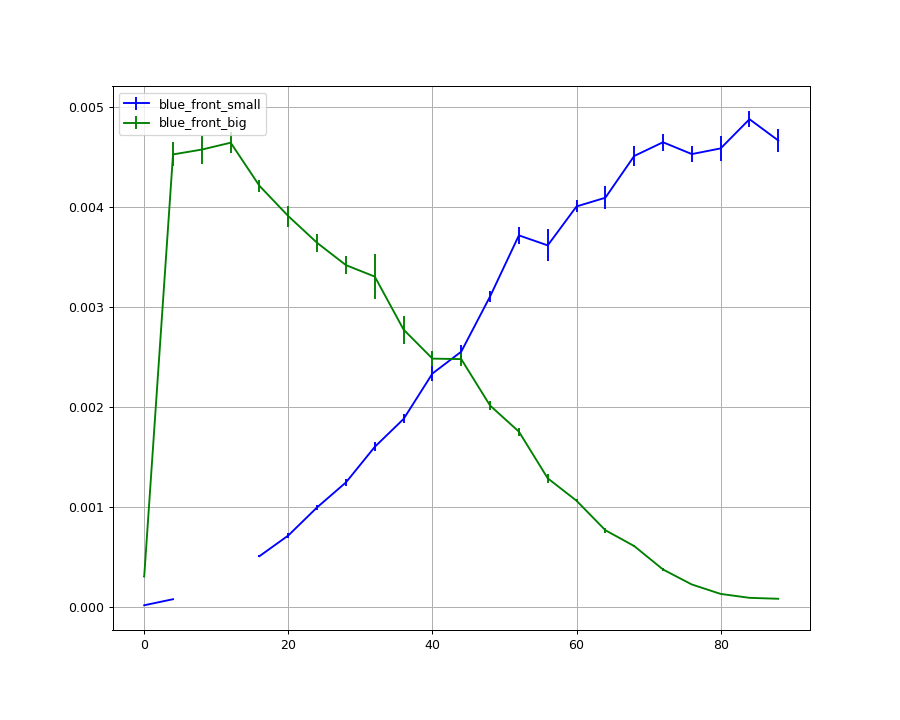

In [155]:
%matplotlib notebook
prefix = 'blue_front_'
N = np.arange(0, 45, 2)
plt.figure(figsize=(10,8))
angles = []
small = []
big = []
err_small = []
err_big = []
for angle in N:
    name = prefix+str(angle)+'deg.csv'
    if name in names:
        i = names.index(name)
        angles.append(angle*2)
        small.append(W_small_est[i])
        big.append(W_big_est[i])
        err_small.append(W_small_width[i]/2)
        err_big.append(W_big_width[i]/2)

plt.errorbar(angles, np.array(small, dtype=np.float64),
             yerr = err_small, color=prefix[:prefix.find('_')], label=prefix+'small')
plt.errorbar(angles, np.array(big, dtype=np.float64), 
             yerr = err_big, color='green', label=prefix+'big')
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


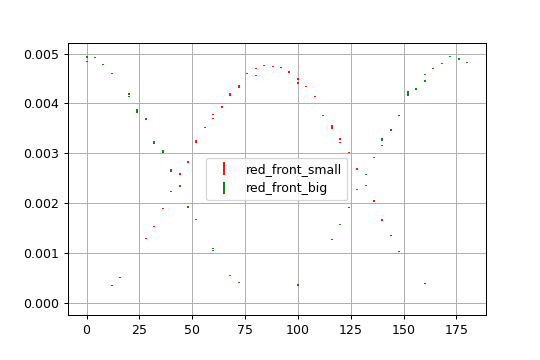

In [125]:
%matplotlib notebook
prefix = 'red_front_'
N = len(names)

front_angles = []
front_small = []
front_big = []
err_small = []
err_big = []
for i in range(N):
    if prefix in names[i] and 'small' not in names[i]:
        front_angles.append(int(names[i][len(prefix):names[i].find('deg')])*2)
        front_small.append(W_small_est[i])
        front_big.append(W_big_est[i])
        err_small.append(W_small_width[i]/2)
        err_big.append(W_big_width[i]/2)

plt.errorbar(front_angles, np.array(front_small, dtype=np.float64), ls='', 
             yerr = err_small, color=prefix[:prefix.find('_')], label=prefix+'small')
plt.errorbar(front_angles, np.array(front_big, dtype=np.float64), ls='', 
             yerr = err_big, color='green', label=prefix+'big')
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


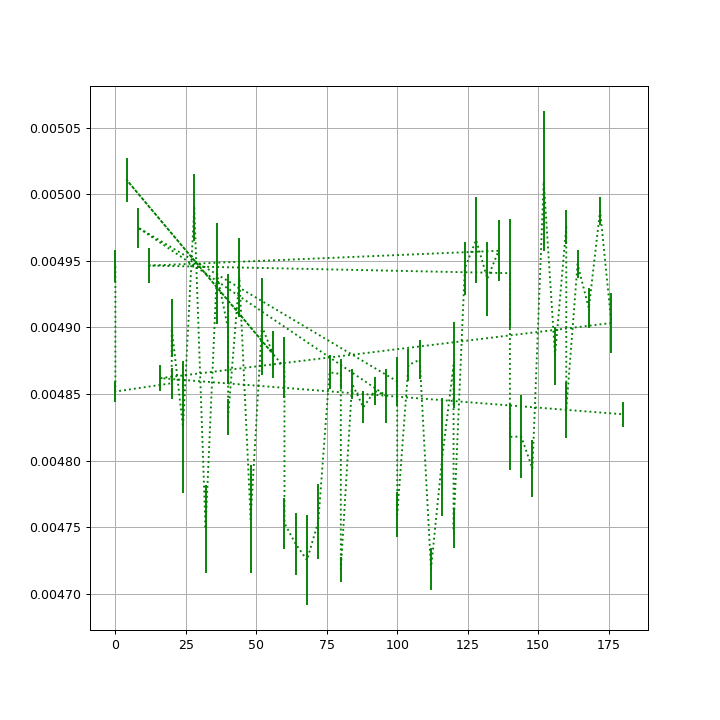

In [114]:
plt.figure(figsize=(8,8))
plt.errorbar(blue_front_angles, 
             np.array(blue_front_big, dtype=np.float64)+np.array(blue_front_small, dtype=np.float64),
             yerr = np.array(blue_err_big, dtype=np.float64)+np.array(blue_err_small, dtype=np.float64), ls='dotted', color='green', label=name+'big')
plt.grid()

In [78]:
%matplotlib inline
@interact_manual(da=(-10,10,0.1))
def plot(da):
    alpha = (np.array(blue_front_angles)+da)/180*np.pi
    Ix = np.array(blue_front_big)
    Iy = np.array(blue_front_small)
    for i in range(len(Iy)):
        if Iy[i]==None:
            Iy[i]=np.nan
    print(alpha)
    plt.plot(alpha/np.pi*180, (Ix*np.cos(alpha)**2-Iy*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='x')
    plt.plot(alpha/np.pi*180, (Iy*np.cos(alpha)**2-Ix*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='y')
    plt.plot(alpha/np.pi*180, Ix+Iy, '.')
    plt.grid()
    plt.legend()
    plt.ylim(-0.01, 0.01)
    

interactive(children=(FloatSlider(value=0.0, description='da', max=10.0, min=-10.0), Button(description='Run I…

[0.         0.34906585 0.41887902 0.48869219 0.55850536 0.62831853
 0.6981317  0.76794487 0.83775804 0.90757121 0.97738438 0.06981317
 1.04719755 1.11701072 1.18682389 1.25663706 1.32645023 1.3962634
 1.46607657 1.53588974 1.60570291 0.13962634 0.20943951 0.27925268]


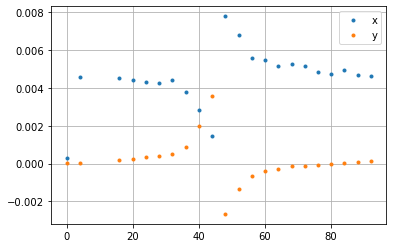

In [80]:
%matplotlib inline
alpha = (np.array(blue_front_angles))/180*np.pi
Ix = np.array(blue_front_big)
Iy = np.array(blue_front_small)
for i in range(len(Iy)):
    if Iy[i]==None:
        Iy[i]=np.nan
print(alpha)
#plt.plot(alpha/np.pi*180, 1/(Ix*np.cos(alpha)**2-Iy*np.sin(alpha)**2)*(Iy*np.cos(alpha)**2-Ix*np.sin(alpha)**2), '.', label='x/y')
plt.plot(alpha/np.pi*180, (Ix*np.cos(alpha)**2-Iy*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='x')
plt.plot(alpha/np.pi*180, (Iy*np.cos(alpha)**2-Ix*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='y')

#plt.plot(alpha/np.pi*180, (Iy*np.cos(alpha)**2-Ix*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='y')
#plt.plot(alpha/np.pi*180, Ix+Iy, '.')
plt.grid()
plt.legend()
#plt.ylim(-0.01, 0.01)


In [70]:
alpha = np.array(blue_front_angles)/180*np.pi
Ix = np.array(blue_front_big)
Iy = np.array(blue_front_small)
print(Iy)
plt.plot(alpha/np.pi*180, Iy*np.sin(alpha)**2)#/np.cos(2*alpha), '.', label='x')

[1.8316999999998517e-05 0.0007167950000002532 0.0009982610000004856
 0.0012477889999938474 0.0016035969999889906 0.0018828469999981143
 0.002337201999989565 0.002556084999996758 0.0031084779999860173
 0.003719733999956495 0.003619675999991115 7.891800000000639e-05
 0.004009430999985011 0.004096535000039671 0.004514092000110006
 0.004651724000118371 0.004533253000022592 0.0045900700000184045
 0.004882252000082235 0.004669285000017557 0.0046050370000088785 None None
 0.0005098130000005701]


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [74]:
%matplotlib inline
@interact_manual(da=(-10,10,0.1))
def plot(da):
    alpha = (np.array(blue_front_angles)+da)/180*np.pi
    Ix = np.array(blue_front_big)
    Iy = np.array(blue_front_small)
    plt.plot(alpha/np.pi*180, (Ix*np.cos(alpha)**2-Iy*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='x')
    plt.plot(alpha/np.pi*180, (Iy*np.cos(alpha)**2-Ix*np.sin(alpha)**2)/np.cos(2*alpha), '.', label='y')
    plt.plot(alpha/np.pi*180, Ix+Iy, '.')
    plt.grid()
    plt.legend()
    plt.ylim(-0.01, 0.01)

NameError: name 'interact_manual' is not defined

In [54]:
np.array(blue_front_big)

array([4.931329e-03, 4.838669e-03, 4.137132e-03, 4.183245e-03,
       3.847410e-03, 3.689662e-03, 3.218468e-03, 3.040019e-03,
       2.660911e-03, 2.648969e-03, 2.348662e-03, 1.926136e-03,
       1.667512e-03, 1.359689e-03, 4.924900e-03, 1.092604e-03,
       1.053002e-03, 8.001660e-04, 5.547630e-04, 4.103320e-04,
       2.626920e-04, 1.547010e-04, 1.556880e-04, 1.030630e-04,
       9.396600e-05, 1.382030e-04, 2.201350e-04, 4.782366e-03,
       3.718800e-04, 3.512330e-04, 5.366200e-04, 7.437710e-04,
       9.626670e-04, 1.274482e-03, 1.582025e-03, 1.527355e-03,
       1.920525e-03, 2.271343e-03, 2.579286e-03, 2.911824e-03,
       4.594761e-03, 3.271273e-03, 3.158064e-03, 3.460435e-03,
       3.758934e-03, 4.201872e-03, 4.299073e-03, 4.578321e-03,
       4.446988e-03, 4.706189e-03, 4.800301e-03, 4.950165e-03,
       4.895853e-03, 4.351432e-03, 4.814952e-03])

In [56]:
alpha

array([0.        , 0.        , 0.34906585, 0.34906585, 0.41887902,
       0.48869219, 0.55850536, 0.62831853, 0.6981317 , 0.6981317 ,
       0.76794487, 0.83775804, 0.90757121, 0.97738438, 0.06981317,
       1.04719755, 1.04719755, 1.11701072, 1.18682389, 1.25663706,
       1.32645023, 1.3962634 , 1.3962634 , 1.46607657, 1.53588974,
       1.60570291, 1.67551608, 0.13962634, 1.74532925, 1.74532925,
       1.81514242, 1.88495559, 1.95476876, 2.02458193, 2.0943951 ,
       2.0943951 , 2.16420827, 2.23402144, 2.30383461, 2.37364778,
       0.20943951, 2.44346095, 2.44346095, 2.51327412, 2.58308729,
       2.65290046, 2.72271363, 2.7925268 , 2.7925268 , 2.86233997,
       2.93215314, 3.00196631, 3.07177948, 0.27925268, 3.14159265])

In [1]:
import matplotlib.colors as colors